# <center><u> Tips dataset analysis </u> </center>
<p>
Food servers’ tips in restaurants may be influenced by many
factors, including the nature of the restaurant, size of the party, and table
locations in the restaurant. Restaurant managers need to know which factors
matter when they assign tables to food servers. For the sake of staff morale,
they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the United
States) are a major component of pay.
In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990.
The restaurant, located in a suburban shopping mall, was part of a national
chain and served a varied menu. In observance of local law, the restaurant
offered to seat in a non-smoking section to patrons who requested it. Each
record includes a day and time, and taken together, they show the server’s
work schedule.
</p>

In [177]:
#Toggle code view
from IPython.display import HTML
HTML('''<script>
code_show=true;
function code_toggle(){
if (code_show){
$('div.input').hide();
document.getElementById('btn_toggle').value="Show Code";
}else {
$('div.input').show();
document.getElementById('btn_toggle').value="Hide Code";
}
code_show=!code_show
}
$(document).ready(code_toggle);
</script>
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
</style>
<form action="javascript:code_toggle()">
<input style="float:right" type="submit" id="btn_toggle">

''')

In [178]:
#Import requried libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [179]:
#Visualization settings
sns.set_style(style='white')
sns.set(rc={
    'figure.figsize': (12,7),
    'axes.facecolor': 'white',
    'axes.grid': True,
    'grid.color': '.9',
    'axes.linewidth' : 1.0,
    'grid.linestyle': u'-'},
    font_scale=1.5)
custom_colors = ["#3498db", "#95a5a6","#34495e", "#2ecc71", "#e74c3c"]
sns.set_palette(custom_colors)

In [180]:
#Load data
df_tips = sns.load_dataset('tips')
print ("Data loaded.")

Data loaded.


### Dataset description

In [181]:
print ("sample view of dataframe")
df_tips.head(3)

sample view of dataframe


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [182]:
print ("Data summary: \n")
df_tips.info()

Data summary: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [183]:
print (f"dataset shape : {df_tips.shape}")

dataset shape : (244, 7)


<h3 style='background-color:yellow'>
    Number of observations :  7 <br>
    Number of features:  244 <br>
    2 decimal features, 3 category features, 1 integer feature. <br>
    Tips feature can be considered as dependent variable.
    </h3>

In [184]:
print (f"Null value count : {df_tips.isnull().any().sum()}")

Null value count : 0


<h3 style='background-color:yellow'>
No null values present in dataset.
</h3>

## <center> Features </center>

In [185]:
print (f"Total_bill feature summary :\n {df_tips['total_bill'].describe()}")

Total_bill feature summary :
 count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64


<h3 style='background-color:yellow'>
    Total Bill ranges from 3 to 50$.
    </h3>

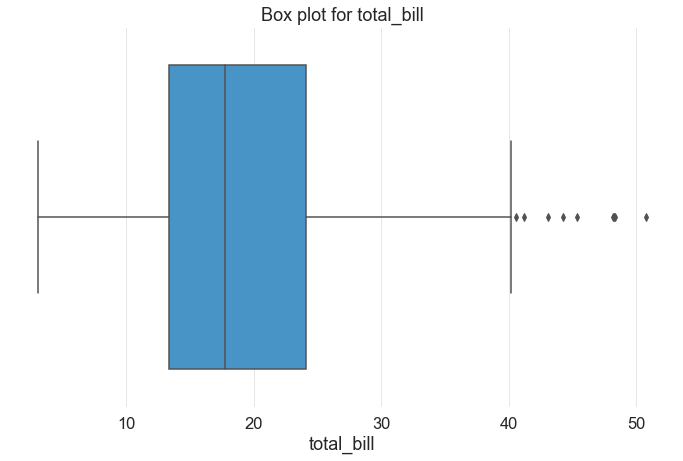

In [186]:
sns.boxplot(df_tips.total_bill).set_title("Box plot for total_bill");

<h3 style='background-color:yellow'>
    Seems like there are outliers after 40$ in total_bill.
    </h3>

In [187]:
print (f"Tip feature summary: \n {df_tips.tip.describe()}")

Tip feature summary: 
 count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64


<h3 style='background-color:yellow'>
Tips ranging from 1  to 10$
</h3>

In [188]:
print (f"Unique values in sex feature : \n {df_tips.sex.unique()}")

Unique values in sex feature : 
 ['Female', 'Male']
Categories (2, object): ['Female', 'Male']


In [189]:
sex_counts = df_tips.sex.value_counts()
print (f"Gender counts :\n {sex_counts}")

Gender counts :
 Male      157
Female     87
Name: sex, dtype: int64


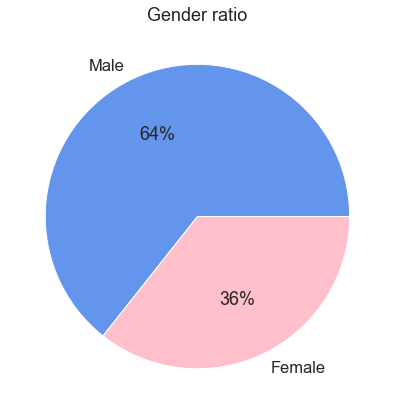

In [190]:
plt.pie(sex_counts, labels=["Male","Female"], 
        autopct=lambda p: f'{p:.0f}%',
        colors=['cornflowerblue','pink']);
plt.title("Gender ratio");

<h3 style='background-color:yellow'>
    157 males and 87 females are there in dataset. <br>
    i.e. 64% males and 36% females
    </h3>
    

Value counts for smoker feature : 
 No     151
Yes     93
Name: smoker, dtype: int64


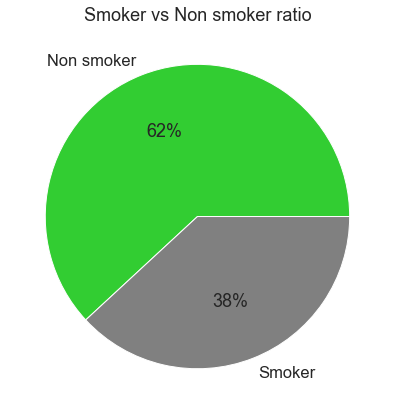

In [191]:
print (f"Value counts for smoker feature : \n {df_tips.smoker.value_counts()}")
plt.pie(df_tips.smoker.value_counts(), labels=["Non smoker", "Smoker"],autopct=lambda s: f'{s:.0f}%',colors=['limegreen', 'grey']);
plt.title("Smoker vs Non smoker ratio");

<h3 style='background-color:yellow'>
    62% people are smokers and 38% people are non smokers.
    </h3>

Unique valiues in days feature: 
 ['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']


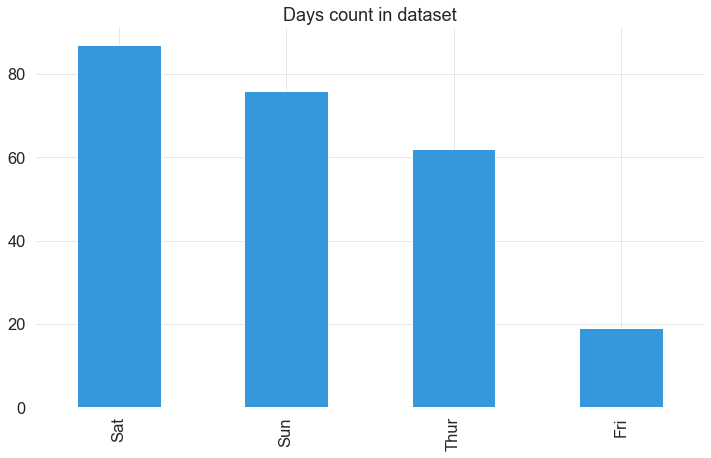

In [192]:
print (f"Unique valiues in days feature: \n {df_tips.day.unique()}");
df_tips.day.value_counts().plot.bar().set_title("Days count in dataset");

<h3 style='background-color:yellow'>
    People used to come to restaurent more in Saturday and very less in Fridays.
</h3>


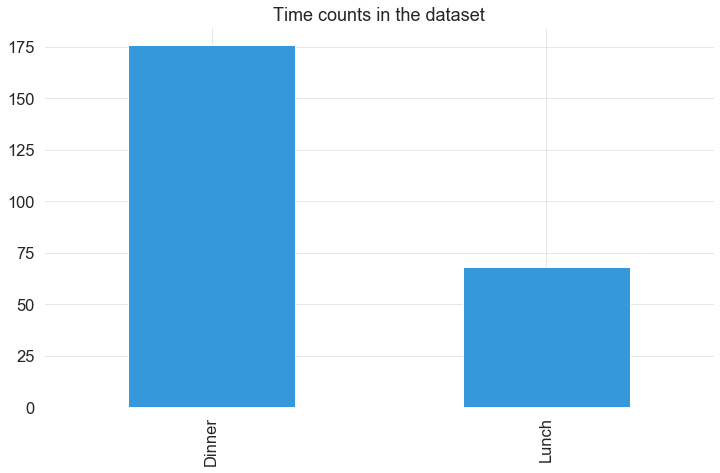

In [193]:
df_tips.time.value_counts().plot.bar().set_title("Time counts in the dataset");

<h3 style='background-color:yellow'>
    People prefer Dinner time more than Lunch time.
</h3>

In [194]:
print (f"Unique values in the size feature: \n {df_tips['size'].unique()}")

Unique values in the size feature: 
 [2 3 4 1 6 5]


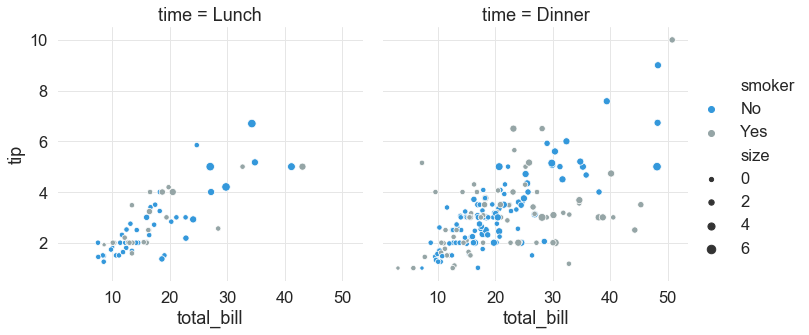

In [195]:
sns.relplot(
data=df_tips,
x="total_bill",
y="tip",
col="time",
hue="smoker",
size='size');

Relation between variables:


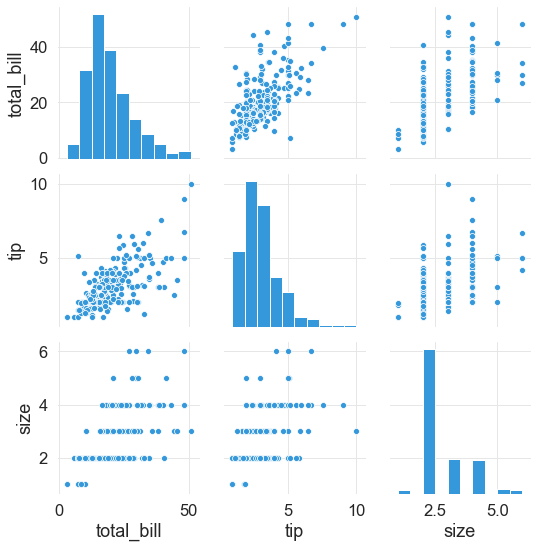

In [196]:
print ("Relation between variables:")
sns.pairplot(df_tips);

<h3 style='background-color:yellow'>
    As the total bill increases, there is a positive increase in the tips as well. <br>
    There is linear relation ship exists between total_bill and tip
</h3>

In [197]:
print (" How much maximum tip a smoker person will give?")
df_input[df_input.smoker_category==1].sort_values('tip',ascending=False).head(1).tip

 How much maximum tip a smoker person will give?


183    6.5
Name: tip, dtype: float64

In [198]:
print (" How much maximum tip a non smoker person will give?")
df_input[df_input.smoker_category==0].sort_values('tip',ascending=False).head(1).tip

 How much maximum tip a non smoker person will give?


23    7.58
Name: tip, dtype: float64

<h3 style='background-color:yellow'>
    A non smoker person gave more amount than a smoker person.
    </h3>

In [199]:
#Create a new dataframe for making the feature modifications
df_input = df_tips.copy()

In [200]:
lbl_encoder = LabelEncoder()

In [201]:
#Use the label encoder to represent the string categorical sex feature
df_input["gender"]=lbl_encoder.fit_transform(df_input.sex)
print ("Created new feature -gender from sex, using label encoding method.")

Created new feature -gender from sex, using label encoding method.


In [202]:
#Drop the initial string categorical sex feature
df_input.drop(["sex"], axis=1, inplace=True)
print ('Removed the feature sex.')

Removed the feature sex.


In [203]:
#Use the label encoder to represent smoker categorical feature
df_input["smoker_category"]=lbl_encoder.fit_transform(df_input.smoker)
print ("Created new feature smoker_category from smoker using label encoder")

Created new feature smoker_category from smoker using label encoder


In [204]:
#Delete the smoker string categorical feature
df_input.drop("smoker", axis=1,inplace=True)
print ("Removed the feature smoker")

Removed the feature smoker


In [205]:
#Create a binary categorical features for day and time
#Delete the original columns after creating the binary categorical variable
category_vars = ["day","time"]
for category in category_vars:
    df_input=pd.concat([df_input,pd.get_dummies(df_input[category], prefix=category)],axis=1)
    df_input.drop(category, axis=1,inplace=True)
    print (f"Applied label encoding for  {category}")

Applied label encoding for  day
Applied label encoding for  time


In [206]:
print ("Records with total_bill > 40")
df_input[df_input["total_bill"]>40]

Records with total_bill > 40


,total_bill,tip,size,gender,smoker_category,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
59,48.27,6.73,4,1,0,0,0,1,0,0,1
95,40.17,4.73,4,1,1,0,1,0,0,0,1
102,44.30,2.50,3,0,1,0,0,1,0,0,1
142,41.19,5.00,5,1,0,1,0,0,0,1,0
156,48.17,5.00,6,1,0,0,0,0,1,0,1
170,50.81,10.00,3,1,1,0,0,1,0,0,1
182,45.35,3.50,3,1,1,0,0,0,1,0,1
184,40.55,3.00,2,1,1,0,0,0,1,0,1
197,43.11,5.00,4,0,1,1,0,0,0,1,0
212,48.33,9.00,4,1,0,0,0,1,0,0,1


In [207]:
print ("Removed the rows observations with total_bill > 40")
df_input.drop(df_input[df_input["total_bill"]>40].index,inplace=True)

Removed the rows observations with total_bill > 40


In [208]:
print (f"Shape of the dataset : {df_input.shape}")

Shape of the dataset : (234, 11)


In [209]:
#Linear regression model 
lr = LinearRegression()

In [210]:
y=df_input.tip
x=df_input.drop('tip',axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)

In [211]:
print ("Shape of x_train, x_test, y_train and y_test : ")
print (x_train.shape,x_test.shape,y_train.shape,y_test.shape)

Shape of x_train, x_test, y_train and y_test : 
(175, 10) (59, 10) (175,) (59,)


In [212]:

lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [213]:
r_score = lr.score(x_test,y_test)
print (f"Coefficient of determination :  {r_score}")

Coefficient of determination :  0.4285980995272849


In [214]:
y_pred = lr.predict(x_test)

In [215]:
df_compare = pd.DataFrame({"Pred": y_pred,"Test":y_test})

In [216]:
df_compare = pd.concat([x_test, df_compare],axis=1)

In [217]:
df_plot=df_compare.loc[:,['total_bill','Pred','Test']]

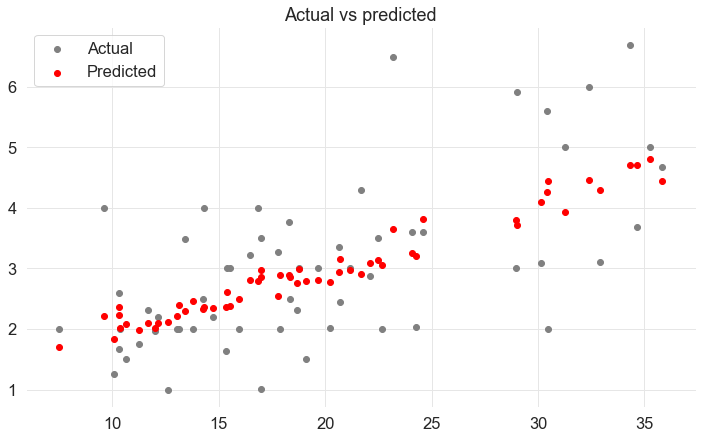

In [226]:
plt.scatter(df_plot.total_bill, df_plot.Test,color='grey', label="Actual");
plt.scatter(df_plot.total_bill, df_plot.Pred, color='red', label="Predicted");
plt.legend()
plt.title("Actual vs predicted");